<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab09/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

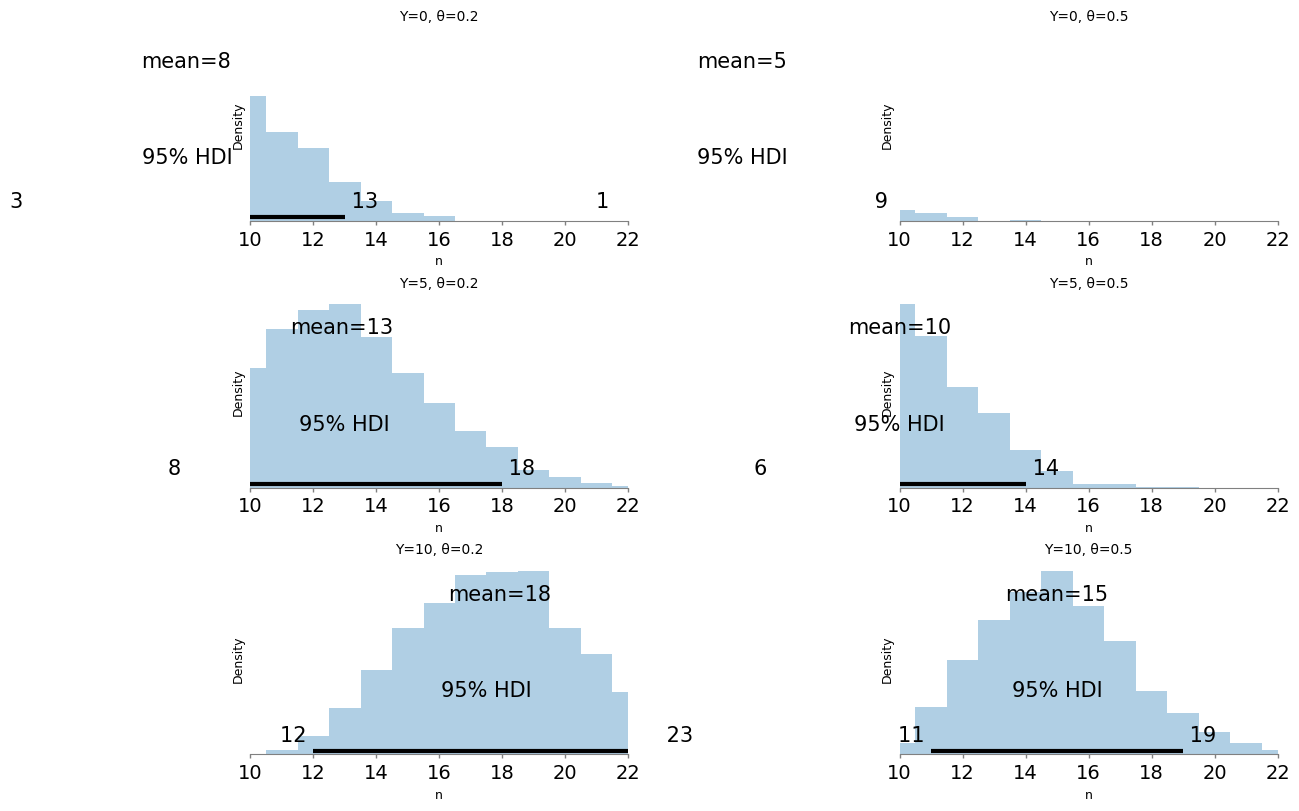

In [7]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


y_values = [0, 5, 10]
theta_values = [0.2, 0.5]
prior_lambda = 10

results = {}

for theta in theta_values:
    for y in y_values:
        with pm.Model() as model:
            n = pm.Poisson("n", mu=prior_lambda)
            y_obs = pm.Binomial("y_obs", n=n, p=theta, observed=y)

            trace = pm.sample(2000, return_inferencedata=True, progressbar=False)
            results[(y, theta)] = trace

fig, axs = plt.subplots(3, 2, figsize=(12, 8), constrained_layout=True)
x_limits = (10, 22)

for i, y in enumerate(y_values):
    for j, theta in enumerate(theta_values):
        ax = axs[i, j]
        az.plot_posterior(
            results[(y, theta)], var_names=["n"], ax=ax, hdi_prob=0.95
        )
        ax.set_title(f"Y={y}, θ={theta}", fontsize=10)
        ax.set_xlim(*x_limits)
        ax.set_xlabel("n", fontsize=9)
        ax.set_ylabel("Density", fontsize=9)
plt.show()
